# Summary of Exploratory Data Analysis

* FlourishOA data contains 3,413 journals and 9,318 data points.
* The DOAJ journal list downloaded on 3/12/17 contains 9,391 journals.
* 1,080 of the FlourishOA journals are also contained in the DOAJ journals (31.6% of FlourishOA journals are a match with DOAJ journals).
* 11.5% of DOAJ journals are contained in the FlourishOA journals list.
* 4,974 APC prices in the FlourishOA data are NAs.
* 3,603 AI Scores in the FlourishOA data are NAs.
* 4,210 categories in the FlourishOA data are NAs.
* 737 journals that are in both FlourishOA and DOAJ data have APC prices.
* 2,226 journals in the DOAJ data have APCs (currency varies).

In [123]:
# Load required libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [124]:
# Import DOAJ journals downloaded from https://doaj.org/faq#metadata
doaj = pd.read_csv('data/doaj_20170312_0000_utf8.csv')
# output rows count, column count
print(doaj.shape)

(9392, 57)


In [125]:
# Import FlourishOA full dataset
our_fulldata = pd.read_csv('data/flourishoa_fulldata_20170311test.csv', encoding = "utf_8")
# output rows count, column count
print(our_fulldata.shape)

(9319, 17)


In [126]:
# Import FlourishOA journals only table
flourish_journals = pd.read_csv('data/flourishoa_journals_20170207.csv', sep="\t")
# output rows count, column count
print(flourish_journals.shape)

(3414, 5)


In [127]:
# Check for null print issn values in doaj data
doaj['Journal ISSN (print version)'].isnull().sum()

3000

In [128]:
# Check for null online issn values in doaj data
doaj['Journal EISSN (online version)'].isnull().sum()

2400

In [129]:
# Check whether there are journals with no known ISSN
((doaj['Journal ISSN (print version)'].isnull()) & (doaj['Journal EISSN (online version)'].isnull())).sum()

0

In [190]:
# Using FlourishOA journals only data, determine how FlourishOA list compares with DOAJ list of journals
print_issns = pd.merge(doaj, flourish_journals, 
                         left_on="Journal ISSN (print version)", 
                         right_on='issn', how='inner')
online_issns = pd.merge(doaj, flourish_journals, 
                          left_on="Journal EISSN (online version)", 
                          right_on='issn', how='inner')
our_tot = (print_issns.shape[0] + online_issns.shape[0] - 1)
doaj_tot = doaj.shape[0] - 1
print("Our segment of DOAJ: " + str(our_tot))
print("Percent of our data that matches DOAJ data: %" + str(((our_tot / (flourish_journals.shape[0]-1))*100)))
print("DOAJ Total: " + str(doaj_tot))
print("Percent of DOAJ data that matches our data: %" + str(100 * (our_tot / doaj_tot)))

Our segment of DOAJ: 1080
Percent of our data that matches DOAJ data: %31.64371520656314
DOAJ Total: 9391
Percent of DOAJ data that matches our data: %11.500372697263337


In [131]:
# Concatenate the two dfs to get the full set of matched journals
matched_issns = pd.concat([print_issns, online_issns])
matched_issns.shape

(1081, 62)

In [132]:
# Check if there are duplicate issns in the dataframe
matched_issns['issn'].nunique()

1080

In [133]:
# Investigate the fulldata df
print(our_fulldata.shape)
print(our_fulldata.columns)

(9319, 17)
Index(['id', 'price', 'date_stamp.x', 'journal_id', 'influence_id',
       'article_influence', 'est_article_influence', 'date_stamp.y',
       'ai_percentile', 'cost_effectiveness', 'ef_percentile', 'eigenfactor',
       'efn', 'journal_name', 'pub_name', 'is_hybrid', 'category'],
      dtype='object')


In [134]:
our_fulldata['price'].mean()

1768.1896432681242

In [135]:
our_fulldata['article_influence'].mean()

0.8674493295486371

In [136]:
# How many rows are missing price data
our_fulldata['price'].isnull().sum()

4974

In [137]:
# How many rows are missing article influence data
our_fulldata['article_influence'].isnull().sum()

3603

In [138]:
# How many rows are missing category data
our_fulldata['category'].isnull().sum()

4210

In [139]:
# Check for null issn values
our_fulldata['journal_id'].isnull().sum()

0

In [140]:
# Group the data by category and count the instances
our_fulldata.groupby('category').size()

category
ANTHROPOLOGY                          37
ASTRONOMY AND ASTROPHYSICS            18
CIRCUITS                              19
COMPUTER SCIENCE                      27
DENTISTRY                             15
DERMATOLOGY                            6
ECOLOGY AND EVOLUTION                331
ECONOMICS                             49
EDUCATION                             34
ENERGY                                44
ENVIRONMENTAL HEALTH                  73
FOOD SCIENCE                         172
GASTROENTEROLOGY                      79
GEOTECHNOLOGY                         13
HIGH ENERGY PHYSICS                   17
HISTORY AND PHILOSOPHY OF SCIENCE     37
INFECTIOUS DISEASES                  164
INFORMATION SCIENCE                   11
LAW                                  193
LINGUISTICS                           35
MARKETING                             33
MATHEMATICS                          169
MEDICINE                             734
MOLECULAR AND CELL BIOLOGY           879
MYCOLOG

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 47 Text xticklabel objects>)

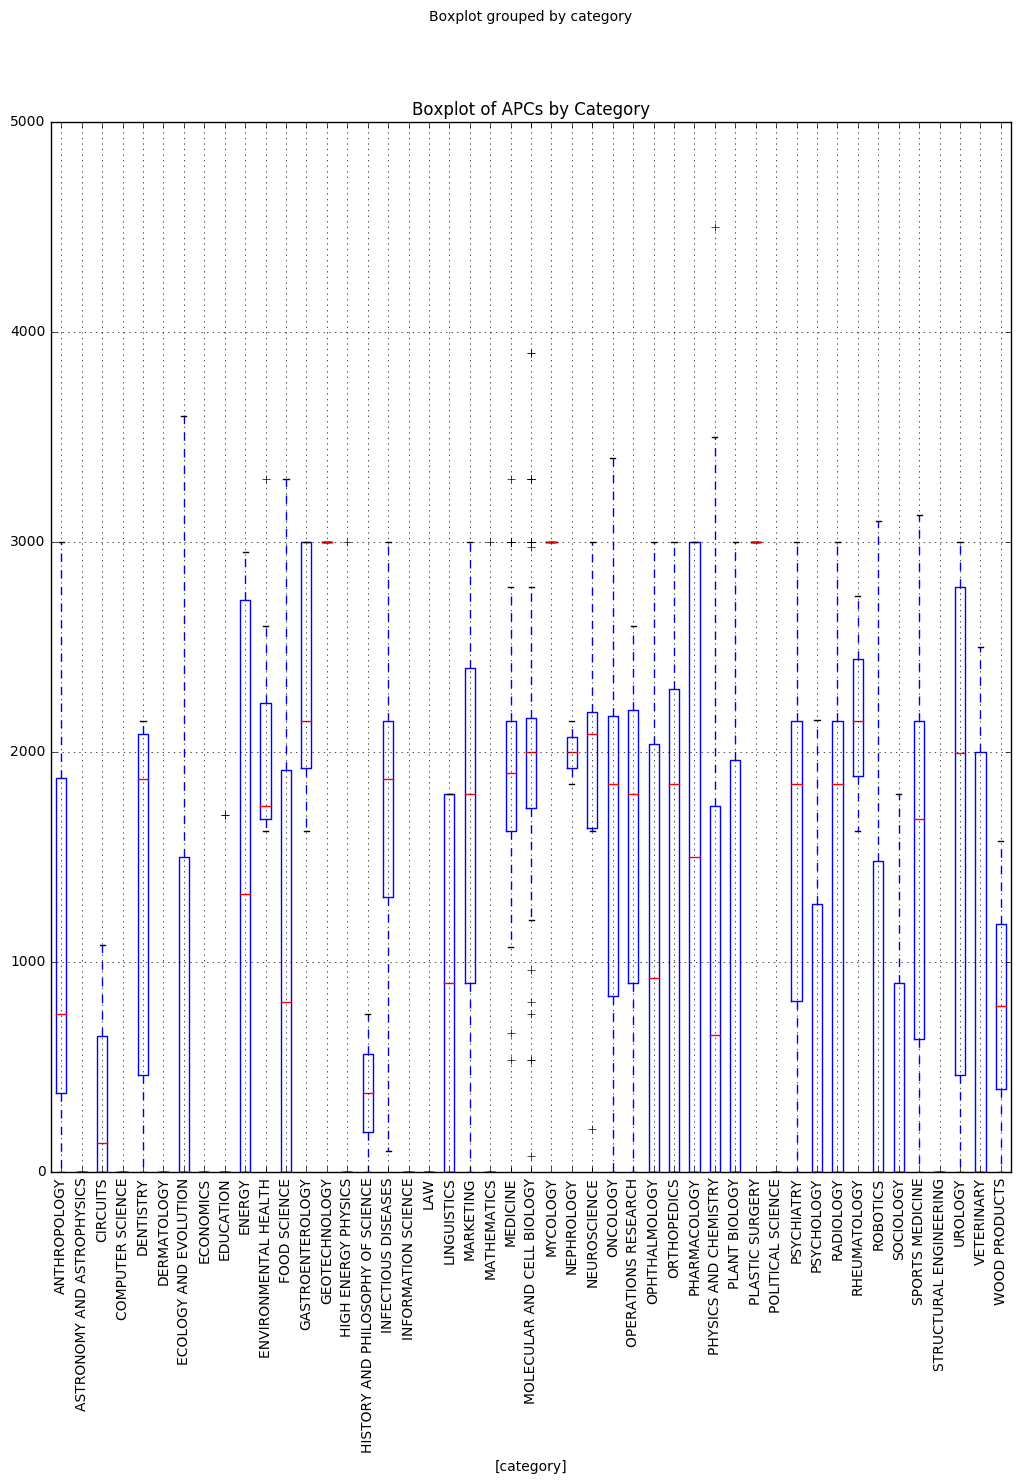

In [141]:
# Create a boxplot of price that is separated by category
our_fulldata[['category', 'price']].boxplot(by='category', figsize=[12,14])

plt.title('Boxplot of APCs by Category')
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 47 Text xticklabel objects>)

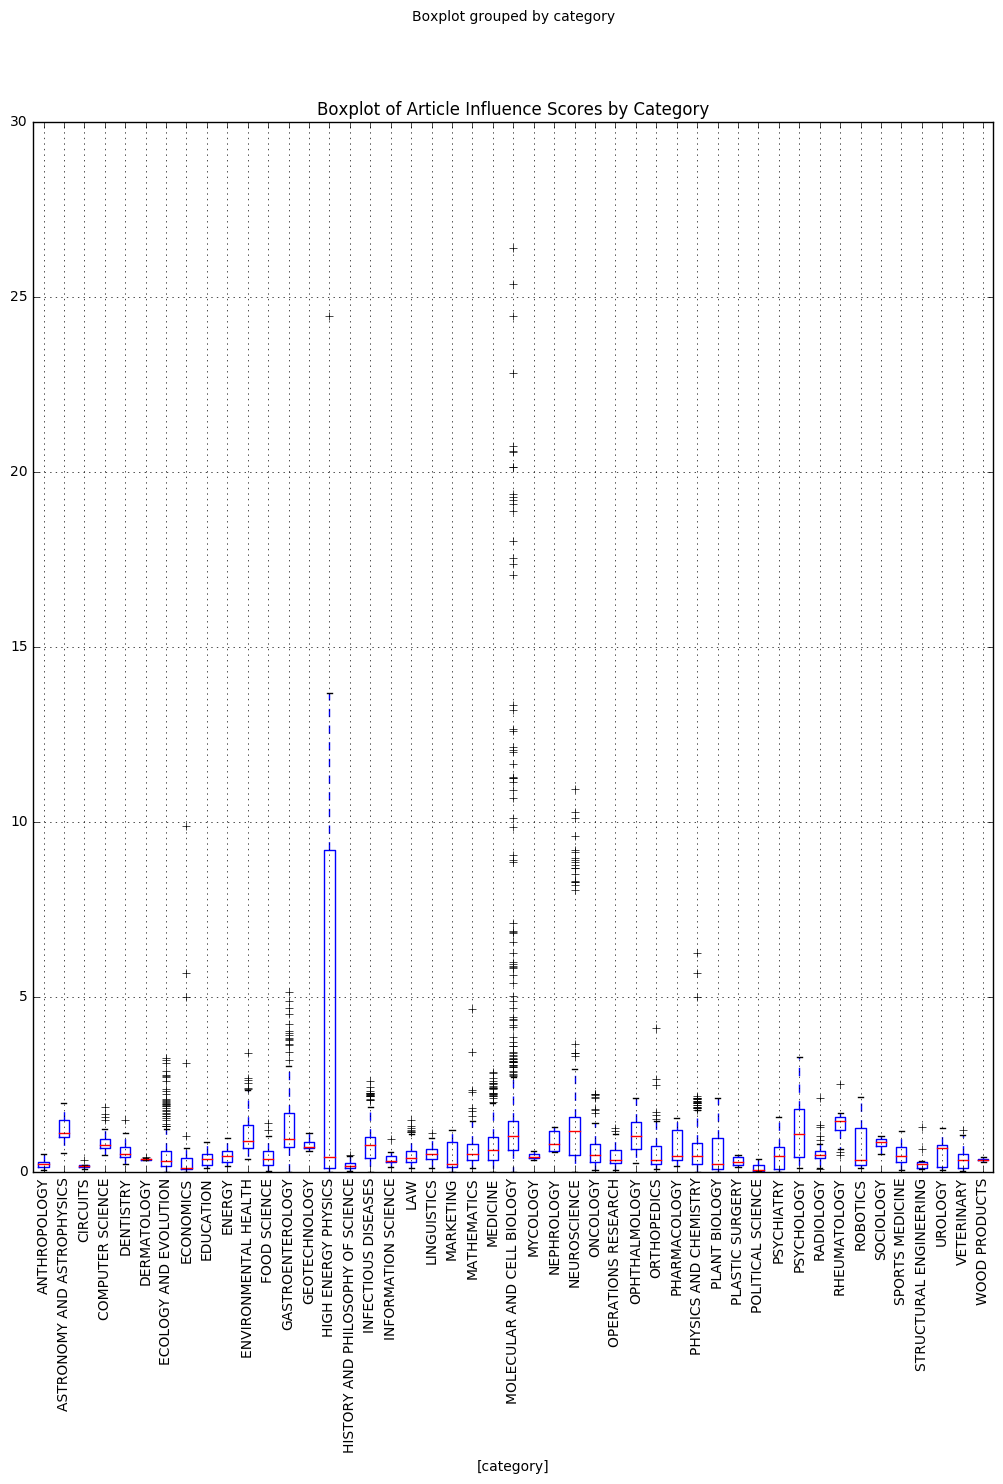

In [142]:
# Create a boxplot of AI Scores that is separated by category
our_fulldata[['category', 'article_influence']].boxplot(by='category', figsize=[12,14])
plt.title('Boxplot of Article Influence Scores by Category')
plt.xticks(rotation = 90)

In [143]:
# Show summary statistics grouped by category for APC and AI values
our_fulldata.groupby('category')[['price', 'article_influence']].agg(['min', 'max', 'mean', 'median', 'count'])

price                                     \
                                      min     max         mean  median count   
category                                                                       
ANTHROPOLOGY                          0.0  3000.0  1250.000000   750.0     3   
ASTRONOMY AND ASTROPHYSICS            0.0     0.0     0.000000     0.0     2   
CIRCUITS                              0.0  1080.0   353.500000   135.0     6   
COMPUTER SCIENCE                      0.0     0.0     0.000000     0.0     6   
DENTISTRY                             0.0  2145.0  1339.166667  1872.5     6   
DERMATOLOGY                           0.0     0.0     0.000000     0.0     2   
ECOLOGY AND EVOLUTION                 0.0  3600.0   622.169811     0.0    53   
ECONOMICS                             0.0     0.0     0.000000     0.0    12   
EDUCATION                             0.0  1700.0   377.777778     0.0     9   
ENERGY                                0.0  2950.0  1400.000000  1325.0     4   
ENVIRONMENTAL HEALTH                  0.0  3300.0  1755.416667  1742.5    12   
FOOD SCIENCE                          0.0  3300.0   995.161290   810.0    31   
GASTROENTEROLOGY                   1625.0  3000.0  2340.909091  2145.0    11   
GEOTECHNOLOGY                      3000.0  3000.0  3000.000000  3000.0     1   
HIGH ENERGY PHYSICS                   0.0  3000.0   600.000000     0.0     5   
HISTORY AND PHILOSOPHY OF SCIENCE     0.0   750.0   375.000000   375.0     2   
INFECTIOUS DISEASES                   0.0  3000.0  1552.500000  1872.5    34   
INFORMATION SCIENCE                   0.0     0.0     0.000000     0.0     1   
LAW                                   0.0     0.0     0.000000     0.0    21   
LINGUISTICS                           0.0  1800.0   900.000000   900.0     4   
MARKETING                             0.0  3000.0  1600.000000  1800.0     3   
MATHEMATICS                           0.0  3000.0    83.333333     0.0    36   
MEDICINE                              0.0  3300.0  1629.387879  1900.0   165   
MOLECULAR AND CELL BIOLOGY            0.0  5000.0  1997.550000  2000.0   180   
MYCOLOGY                           3000.0  3000.0  3000.000000  3000.0     1   
NEPHROLOGY                         1845.0  2145.0  1996.666667  2000.0     3   
NEUROSCIENCE                          0.0  5000.0  1742.103448  2086.0    58   
ONCOLOGY                              0.0  3400.0  1560.483871  1845.0    31   
OPERATIONS RESEARCH                   0.0  2600.0  1466.666667  1800.0     3   
OPHTHALMOLOGY                         0.0  3000.0  1123.750000   922.5     8   
ORTHOPEDICS                           0.0  3000.0  1267.272727  1845.0    11   
PHARMACOLOGY                          0.0  3000.0  1500.000000  1500.0     4   
PHYSICS AND CHEMISTRY                 0.0  4500.0   973.123457   652.0    81   
PLANT BIOLOGY                         0.0  3000.0   931.863636     0.0    22   
PLASTIC SURGERY                    3000.0  3000.0  3000.000000  3000.0     1   
POLITICAL SCIENCE                     0.0     0.0     0.000000     0.0     3   
PSYCHIATRY                            0.0  3000.0  1514.210526  1845.0    19   
PSYCHOLOGY                            0.0  2150.0   589.307692     0.0    13   
RADIOLOGY                             0.0  3000.0  1303.888889  1845.0     9   
RHEUMATOLOGY                       1625.0  2740.0  2170.000000  2145.0     3   
ROBOTICS                              0.0  3100.0   833.875000     0.0     8   
SOCIOLOGY                             0.0  1800.0   600.000000     0.0     3   
SPORTS MEDICINE                       0.0  3125.0  1481.136364  1677.5    22   
STRUCTURAL ENGINEERING                0.0     0.0     0.000000     0.0     4   
UROLOGY                               0.0  3000.0  1665.000000  1995.0     6   
VETERINARY                            0.0  2500.0   822.307692     0.0    13   
WOOD PRODUCTS                         0.0  1575.0   787.500000   787.5     2   

                                  a

In [145]:
# How many APCs are missing from the doaj df
doaj['APC amount'].notnull().sum()

2226

In [146]:
# How many APCs are missing from the matched df
matched_issns['APC amount'].notnull().sum()

737

In [147]:
# Merge the matched_issn df with fulldata
match_merge = pd.merge(matched_issns, our_fulldata, left_on="issn", right_on='journal_id', how='left')

In [148]:
match_merge.shape

(3369, 79)

In [149]:
# How many AI scores are in the data
match_merge['article_influence'].notnull().sum()

2134

In [192]:
# How many APCs are in the data
match_merge['price'].notnull().sum()

1722

In [196]:
# Create df with total count of AI scores by ISSN
df1 = match_merge.groupby('issn')['article_influence'].agg('count')

In [197]:
df1 = pd.DataFrame(data = df1)

In [198]:
# How many of the ISSNs have AI scores
df1['article_influence'].notnull().sum()

1080

In [193]:
# Create a df with just three columns
df2 = match_merge[['issn', 'article_influence', 'price']]

In [194]:
# How many AI scores 
df2['article_influence'].notnull().sum()

2134